# K- Nearest Neighbour for data imputation
Data Imputations are processes for dealing with missing data. With large data-sets it may be practical do disregard missing data, although with smaller data-sets this may not be possible. There are many imputation methods some very easy to use but lack accuracy such as mean, median and most frequent values, and some slower more dificult methods to impliment that are more accurate such as multivariate imputation by chained equations or estimating using machine learning models.A half-way point between these two methods that is still simple and quick to use although still brings accurracy is the K-nearest neighbour(KNN) algorithm which uses a vector distance metric to cluster kth similar data points then average the missing data points from that cluster.

The Titanic data-set has 891 entries with 177 missing from what could be a vital 'Age' feature. In this notebook the KNN algorithm using the Euclidean metric will be used to replace this missing data points.

## Import Library's

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


## Load csv file & drop ID column

In [2]:
all_df = pd.read_csv('./titanic_train.csv', index_col=False)
# drop ID column
all_df.drop('PassengerId',axis=1,inplace=True)
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## basic statistics for each column

In [4]:
all_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## check distribution of Age data

In [5]:
all_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

# Assign features to X

In [6]:
X = all_df.drop('Name', axis=1)
X = X.drop('Ticket', axis=1)
X = X.drop('Cabin', axis=1)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


### First , transform the class 'Sex' from thier original string representation (M and F ) into integers
### transform Embarked into integers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Sex']= le.fit_transform(X['Sex'])
X['Embarked']= le.fit_transform(X['Embarked'])

X.head()

## Assign numerical label to y

In [ ]:
y = X['Survived']
X = X.drop('Survived', axis=1)

###  Normalise the features to use MinMaxScaler that scales the values between 0 and 1

<AxesSubplot:>

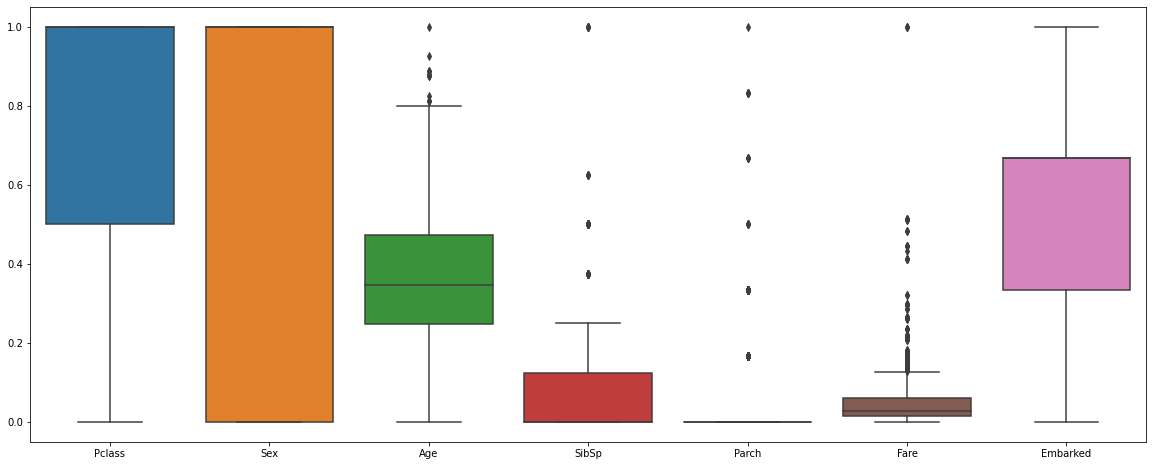

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
fig, ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=df, ax=ax)

In [8]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.666667
1,0.0,0.0,0.472229,0.125,0.0,0.139136,0.000000
2,1.0,0.0,0.321438,0.000,0.0,0.015469,0.666667
3,0.0,0.0,0.434531,0.125,0.0,0.103644,0.666667
4,1.0,1.0,0.434531,0.000,0.0,0.015713,0.666667


In [9]:
df['Age'].describe()

count    714.000000
mean       0.367921
std        0.182540
min        0.000000
25%        0.247612
50%        0.346569
75%        0.472229
max        1.000000
Name: Age, dtype: float64

In [10]:
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [11]:
Xi = df.to_numpy()
Xi

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.01415106,
        0.66666667],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.01546857,
        0.66666667],
       ...,
       [1.        , 0.        ,        nan, ..., 0.33333333, 0.04577135,
        0.66666667],
       [0.        , 1.        , 0.32143755, ..., 0.        , 0.0585561 ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 0.01512699,
        0.33333333]])

In [13]:
euclidean_distance(X[0],X[2])

1.00903577439746

In [12]:
# Locate the most similar neighbors
def get_neighbours(data, row, K):
    distances = list()
    for data_row in data:
        dist = euclidean_distance(row, data_row)
        distances.append((data_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbours = list()
    for i in range(K):
        neighbours.append(distances[i][0])
    return neighbours

In [13]:
def get_avg(neighbours,col):
    sum = 0
    for i in range(len(neighbours)):
        sum += neighbours[i][col]
    return sum / len(neighbours)

In [28]:
neighbours = get_neighbours(Xi, X[0], k)
temp = get_avg(neighbours, 2)
temp

0.2937924101533048

In [30]:
neighbours

[array([1.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.01415106, 0.66666667]),
 array([1.        , 1.        , 0.25860769, 0.        , 0.        ,
        0.01522459, 0.66666667]),
 array([1.        , 1.        , 0.25860769, 0.        , 0.        ,
        0.01571255, 0.66666667]),
 array([1.        , 1.        , 0.24604172, 0.        , 0.        ,
        0.01571255, 0.66666667]),
 array([1.        , 1.        , 0.43453129, 0.        , 0.        ,
        0.01571255, 0.66666667])]

In [47]:
np.isnan(X[5][2])

True

In [53]:
if np.isnan(X[5][2])==True:
    print(1)

1


In [14]:

for i in range(len(Xi)):
    k = 5
    neighbours=list()
    if np.isnan(Xi[i][2]) == True:
        avg=0
        neighbours = get_neighbours(Xi, Xi[i], k)
        avg = get_avg(neighbours, 2)
        Xi[i][2] = avg
    

In [15]:
imp_df = pd.DataFrame(Xi, columns= X.columns)
imp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(7)
memory usage: 48.9 KB


In [16]:
imp_df['Age'].describe()

count    891.000000
mean       0.371667
std        0.163556
min        0.000000
25%        0.271174
50%        0.386781
75%        0.434531
max        1.000000
Name: Age, dtype: float64